In [1]:
import pandas as pd

In [2]:
data = pd.read_table('../../module3_PatternMining/HW1/a.txt')

In [26]:
for col in data.columns:
    print(col)

12a1970 lexmark
2 stacker
21 black jack
2nd mortgage
acapulco hotel
accept account card credit merchant
accept card credit
accept card credit online
accessory computer
accessory desk
accommodation
accommodation hotel
accommodation las vegas
accommodation new york
accommodation orlando
accommodation paris
account card credit merchant
account cost low merchant
account ecommerce merchant
account internet merchant
account merchant
account merchant online
account merchant provider
account merchant service
acid alpha lipoic
acid amino
acid folic
acne medication
acura cl
acyclovir
ad banner
ad personal
add url
address internet
address web
adds personal
adipex
adipex buy
adipex buy online
adipex cheap
adipex diet
adipex diet pill
adipex line
adipex online
adipex online order
adipex online prescription
adipex order
adipex p
adipex phentermine
adipex prescription
adjustable mortgage rate
ads free personal
ads online personal
ads personal picture
ads personal single
ads single
adult
adult amateur

In [32]:
index = np.array(data.columns)

In [39]:
max_len = 0
for ind in index:
    if len(ind.split()) > max_len:
        max_len = len(ind.split())
        
print(max_len)

6


In [23]:
data.head(10)

,12a1970 lexmark,2 stacker,21 black jack,2nd mortgage,acapulco hotel,accept account card credit merchant,accept card credit,accept card credit online,accessory computer,accessory desk,...,woman,work home,xenadrine,xenical,xenical on line,xxx,yohimbe,yukon,zinc,zyban
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data.describe()

,12a1970 lexmark,2 stacker,21 black jack,2nd mortgage,acapulco hotel,accept account card credit merchant,accept card credit,accept card credit online,accessory computer,accessory desk,...,woman,work home,xenadrine,xenical,xenical on line,xxx,yohimbe,yukon,zinc,zyban
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.010000,0.011500,0.01400,0.023000,0.010000,0.010500,0.01250,0.011500,0.01400,0.009500,...,0.015000,0.06100,0.016000,0.02100,0.011500,0.019500,0.01650,0.009500,0.010500,0.016000
std,0.099524,0.106646,0.11752,0.149941,0.099524,0.101956,0.11113,0.106646,0.11752,0.097028,...,0.121583,0.23939,0.125506,0.14342,0.106646,0.138309,0.12742,0.097028,0.101956,0.125506
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,...,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data_np = np.array(data)

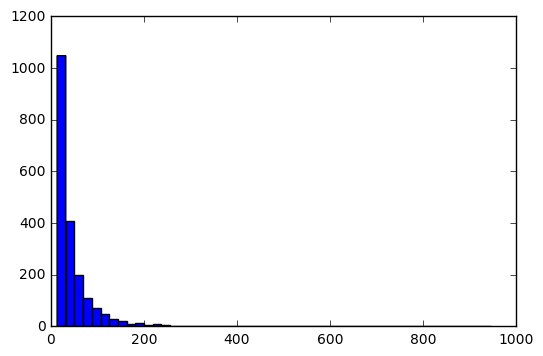

In [28]:
plt.hist(np.sum(data_np, axis=1), bins=50)
plt.show()

In [30]:
max(np.sum(data_np, axis=1))

947

In [27]:
np.sum(data_np[1278, :])

19